# Initial Statistical Analysis

In [26]:
# import tools to analyze dataset with the datascience module
from datascience import *
import numpy as np
import statistics

In [27]:
# access the csv file
picks_data = Table.read_table("second_rounders_2005-14.csv")

In [28]:
picks_data

Unnamed: 0,Draft Year,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG_Perc,3P_Perc,FT_Perc,MP.1,PTS_per_G,TRB_per_G,AST_per_G,WS_per_G,WS_per_48,BPM,VORP
0,2005,31,ATL,Salim Stoudamire,University of Arizona,3,157,2672,1260,214,164,0.407,0.366,0.882,17,8,1.4,1,2.2,0.04,-5.1,-2.1
1,2005,32,LAC,Daniel Ewing,Duke University,2,127,1683,431,158,174,0.389,0.295,0.78,13.3,3.4,1.2,1.4,0.8,0.024,-3.7,-0.7
2,2005,33,NOH,Brandon Bass,Louisiana State University,12,758,16410,6575,3448,608,0.499,0.207,0.832,21.6,8.7,4.5,0.8,42.8,0.125,-1.1,3.7
3,2005,34,UTA,C.J. Miles,0,14,838,17121,8044,1999,902,0.412,0.359,0.81,20.4,9.6,2.4,1.1,30,0.084,-1,4.3
4,2005,35,POR,Ricky Sanchez,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2005,36,MIL,Ersan Ilyasova,0,11,745,17823,7885,4330,855,0.443,0.365,0.773,23.9,10.6,5.8,1.1,44.9,0.121,-0.2,8.3
6,2005,37,LAL,Ronny Turiaf,Gonzaga University,10,473,8020,2209,1757,618,0.533,0,0.636,17,4.7,3.7,1.3,19.2,0.115,1,6
7,2005,38,ORL,Travis Diener,Marquette University,5,179,2660,854,243,432,0.388,0.353,0.847,14.9,4.8,1.4,2.4,5.6,0.102,-1.8,0.1
8,2005,39,LAL,Von Wafer,Florida State University,6,200,2475,1054,234,146,0.42,0.325,0.751,12.4,5.3,1.2,0.7,3.3,0.064,-3.2,-0.7
9,2005,40,GSW,Monta Ellis,0,12,833,29011,14858,2874,3856,0.451,0.314,0.772,34.8,17.8,3.5,4.6,41.9,0.069,-0.3,12.3


In [29]:
# General analysis
print("There are " + str(picks_data.num_rows) + " players drafted in the second round from 2005 to 2014")

avg_yrs = round(np.mean(picks_data.column('Yrs')))
avg_pts = round(np.mean(picks_data.column('PTS_per_G')), 1)
print("The average second rounder will have a " + str(avg_yrs) + " year career.")
print("The average second rounder score " + str(avg_pts) + " points per game in their career.")

# players who played 2 years or less (initial contract is for two years)
two_yrs_or_less = picks_data.where('Yrs', are.below_or_equal_to(2)).column('Player')
print(str(len(two_yrs_or_less)) + " second round picks from 2005-2014 played two years or less in their careers.")

There are 300 players drafted in the second round from 2005 to 2014
The average second rounder will have a 3.0 year career.
The average second rounder score 3.6 points per game in their career.
176 second round picks from 2005-2014 played two years or less in their careers.


In [30]:
# Statistics for Games Played

# General Stats/Fun Facts
print("General Statistics/Fun Facts:")

zero_games = picks_data.where('G', are.equal_to(0)).column('Player')
print(str(len(zero_games)) + " second round picks from 2005-2014 played zero NBA games in their careers.")

avg_games = np.mean(picks_data.column('G'))
std_games = np.std(picks_data.column('G'))
avg_games_per_yr = np.mean(picks_data.column('G')) / np.mean(picks_data.column('Yrs'))
print("Second round picks from 2015-2014 played an average of " + 
      str(round(avg_games)) + " games in their overall career, with standard deviation of " + str(round(std_games)) + ".")
print("The second rounders played an average of " + str(round(avg_games_per_yr)) + " games per year played.")
print("")

# statistics per draft year
print("Statistics per draft year:")
for i in range(2005, 2015):
    year_data = picks_data.where("Draft Year", are.equal_to(i))
    games = year_data.column('G')
    avg_g = np.mean(games)
    per_yr_g = avg_g / np.mean(year_data.column('Yrs'))
    variance = statistics.pvariance(games)
    st_dev = np.std(games)
    print(str(i) + " second rounders played an average of " + 
          str(round(avg_g)) + " games in their career, with " + str(round(per_yr_g)) + " games per year.")
    print("Variance: " + str(variance) + ", Standard Deviation: " + str(round(st_dev,2)))
    print("")

General Statistics/Fun Facts:
75 second round picks from 2005-2014 played zero NBA games in their careers.
Second round picks from 2015-2014 played an average of 152.0 games in their overall career, with standard deviation of 216.0.
The second rounders played an average of 49.0 games per year played.

Statistics per draft year:
2005 second rounders played an average of 285.0 games in their career, with 56.0 games per year.
Variance: 110384, Standard Deviation: 332.24

2006 second rounders played an average of 150.0 games in their career, with 48.0 games per year.
Variance: 51409, Standard Deviation: 226.74

2007 second rounders played an average of 135.0 games in their career, with 48.0 games per year.
Variance: 50843, Standard Deviation: 225.49

2008 second rounders played an average of 163.0 games in their career, with 53.0 games per year.
Variance: 60185, Standard Deviation: 245.33

2009 second rounders played an average of 211.0 games in their career, with 55.0 games per year.
Vari

In [31]:
# Statistics for VORP

vorp_clm = picks_data.column('VORP')
avg_vorp = np.mean(vorp_clm)
std_vorp = np.std(vorp_clm)
print("Second round picks from 2015-2014 have an average VORP of " + 
      str(round((avg_vorp), 1)) + ", with standard deviation of " + str(round(std_vorp, 2)) + ".")
print("")

# statistics per draft year
print("Statistics per draft year:")
for i in range(2005, 2015):
    year_data = picks_data.where("Draft Year", are.equal_to(i))
    vorp_peryr = year_data.column('VORP')
    avg = np.mean(vorp_peryr)
    variance = statistics.pvariance(vorp_peryr)
    st_dev = np.std(vorp_peryr)
    print(str(i) + " second rounders have an average VORP of " + str(round(avg, 1)) + ".")
    print("Variance: " + str(round(variance, 2)) + ", Standard Deviation: " + str(round(st_dev,2)))
    print("")

Second round picks from 2015-2014 have an average VORP of 1.3, with standard deviation of 4.73.

Statistics per draft year:
2005 second rounders have an average VORP of 2.8.
Variance: 29.7, Standard Deviation: 5.45

2006 second rounders have an average VORP of 1.6.
Variance: 46.95, Standard Deviation: 6.85

2007 second rounders have an average VORP of 1.4.
Variance: 43.42, Standard Deviation: 6.59

2008 second rounders have an average VORP of 1.8.
Variance: 30.14, Standard Deviation: 5.49

2009 second rounders have an average VORP of 1.9.
Variance: 17.67, Standard Deviation: 4.2

2010 second rounders have an average VORP of 0.5.
Variance: 2.04, Standard Deviation: 1.43

2011 second rounders have an average VORP of 0.9.
Variance: 11.15, Standard Deviation: 3.34

2012 second rounders have an average VORP of 1.5.
Variance: 19.94, Standard Deviation: 4.47

2013 second rounders have an average VORP of 0.1.
Variance: 0.66, Standard Deviation: 0.81

2014 second rounders have an average VORP o

In [32]:
# Statistics per pick position

for i in range(31,61):
    # filter data by pick position
    data = picks_data.where('Pk', are.equal_to(i))
    
    # Calculate VORP statistics
    vorp_clm = data.column('VORP')
    avg_vorp = np.mean(vorp_clm)
    var_vorp = statistics.pvariance(vorp_clm)
    std_vorp = np.std(vorp_clm)
    
    # Calculate BPM statistics
    bpm_clm = data.column('BPM')
    avg_bpm = np.mean(bpm_clm)
    var_bpm = statistics.pvariance(bpm_clm)
    std_bpm = np.std(bpm_clm)
    
    print("Statistics for 2005-14 draftees picked at slot " + str(i) + ":")
    print("Average VORP: " + str(round(avg_vorp, 2)) + ", Variance: " + str(round(var_vorp, 2)) 
          + ", Standard Deviation: " + str(round(std_vorp, 2)))
    print("Average BPM: " + str(round(avg_bpm, 2)) + ", Variance: " + str(round(var_bpm, 2)) 
          + ", Standard Deviation: " + str(round(std_bpm, 2)))
    print("")

Statistics for 2005-14 draftees picked at slot 31:
Average VORP: 0.42, Variance: 2.01, Standard Deviation: 1.42
Average BPM: -3.29, Variance: 5.88, Standard Deviation: 2.43

Statistics for 2005-14 draftees picked at slot 32:
Average VORP: 0.04, Variance: 0.78, Standard Deviation: 0.88
Average BPM: -4.94, Variance: 19.78, Standard Deviation: 4.45

Statistics for 2005-14 draftees picked at slot 33:
Average VORP: 1.55, Variance: 3.96, Standard Deviation: 1.99
Average BPM: -2.13, Variance: 4.95, Standard Deviation: 2.22

Statistics for 2005-14 draftees picked at slot 34:
Average VORP: 1.85, Variance: 16.27, Standard Deviation: 4.03
Average BPM: -2.25, Variance: 6.01, Standard Deviation: 2.45

Statistics for 2005-14 draftees picked at slot 35:
Average VORP: 5.98, Variance: 86.33, Standard Deviation: 9.29
Average BPM: -1.4, Variance: 14.16, Standard Deviation: 3.76

Statistics for 2005-14 draftees picked at slot 36:
Average VORP: 0.56, Variance: 7.32, Standard Deviation: 2.71
Average BPM: -2

In [33]:
# Same analysis but disregarding players with 0 games

for i in range(31,61):
    # filter data by pick position
    data = picks_data.where('Pk', are.equal_to(i))
    
    # filter out players with 0 games
    data = data.where('G', are.above(0))
    num_players = data.num_rows
    
    # Calculate VORP statistics
    vorp_clm = data.column('VORP')
    avg_vorp = np.mean(vorp_clm)
    var_vorp = statistics.pvariance(vorp_clm)
    std_vorp = np.std(vorp_clm)
    
    # Calculate BPM statistics
    bpm_clm = data.column('BPM')
    avg_bpm = np.mean(bpm_clm)
    var_bpm = statistics.pvariance(bpm_clm)
    std_bpm = np.std(bpm_clm)
    
    print("Statistics for the " + str(num_players)+ " 2005-14 draftees picked at slot " + str(i) + ":")
    print("Average VORP: " + str(round(avg_vorp, 2)) + ", Variance: " + str(round(var_vorp, 2)) 
          + ", Standard Deviation: " + str(round(std_vorp, 2)))
    print("Average BPM: " + str(round(avg_bpm, 2)) + ", Variance: " + str(round(var_bpm, 2)) 
          + ", Standard Deviation: " + str(round(std_bpm, 2)))
    print("")

Statistics for the 10 2005-14 draftees picked at slot 31:
Average VORP: 0.42, Variance: 2.01, Standard Deviation: 1.42
Average BPM: -3.29, Variance: 5.88, Standard Deviation: 2.43

Statistics for the 10 2005-14 draftees picked at slot 32:
Average VORP: 0.04, Variance: 0.78, Standard Deviation: 0.88
Average BPM: -4.94, Variance: 19.78, Standard Deviation: 4.45

Statistics for the 10 2005-14 draftees picked at slot 33:
Average VORP: 1.55, Variance: 3.96, Standard Deviation: 1.99
Average BPM: -2.13, Variance: 4.95, Standard Deviation: 2.22

Statistics for the 9 2005-14 draftees picked at slot 34:
Average VORP: 2.06, Variance: 17.66, Standard Deviation: 4.2
Average BPM: -2.5, Variance: 6.06, Standard Deviation: 2.46

Statistics for the 9 2005-14 draftees picked at slot 35:
Average VORP: 6.64, Variance: 91.51, Standard Deviation: 9.57
Average BPM: -1.56, Variance: 15.49, Standard Deviation: 3.94

Statistics for the 9 2005-14 draftees picked at slot 36:
Average VORP: 0.62, Variance: 8.1, Sta

# Simple Linear Regression using Pick Position and VORP

In [34]:
# import tools for linear regression analysis 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [35]:
# Access csv file as a DataFrame
picks_df = pd.read_csv("second_rounders_2005-14.csv")

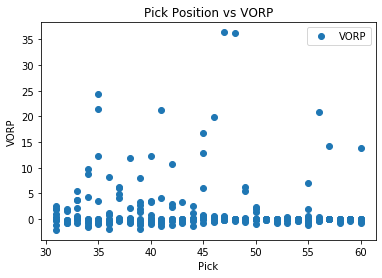

In [36]:
# plot relationship between pick selection and VORP
picks_df.plot(x='Pk', y='VORP', style='o')  
plt.title('Pick Position vs VORP')  
plt.xlabel('Pick')  
plt.ylabel('VORP')  
plt.show()

/srv/app/venv/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


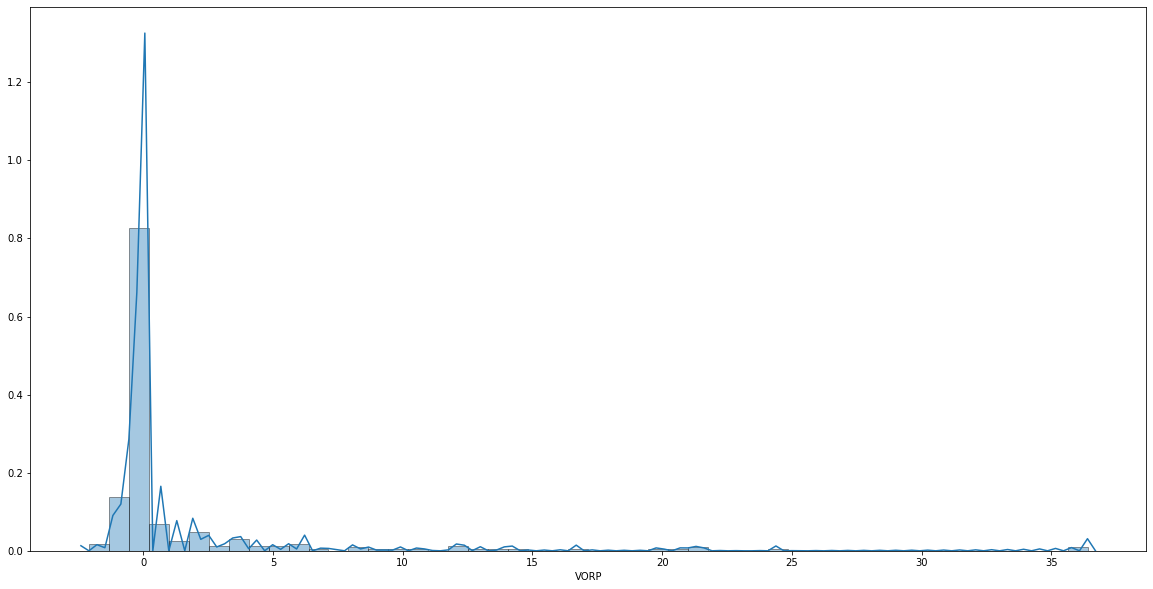

In [37]:
# Graphically observe the average VORP among all 2005-14 second round picks
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.distplot(picks_df['VORP'])

In [38]:
# assert pick position as the independent variable
X = picks_df['Pk'].values.reshape(-1, 1)
Y = picks_df['VORP'].values.reshape(-1, 1)

In [39]:
# Separate into training set and test set (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [40]:
# train the algorithm using the LinearRegression class
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Display intercept and slope using regressor
intercept = regressor.intercept_[0]
slope = regressor.coef_[0][0]
print("Intercept: " + str(round(intercept, 2)) +
     ", Slope: " + str(round(slope, 2)))

Intercept: 3.21, Slope: -0.04


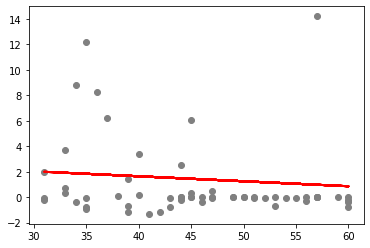

In [42]:
# display as line
Y_pred = regressor.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [43]:
# errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 2.1236227456707675
Mean Squared Error: 9.262295529653306
Root Mean Squared Error: 3.043401966492975


# Multiple Regression

In [44]:
# import tools for multiple regression analysis
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [45]:
draft_df = pd.read_csv("second_rounders_2005-14.csv")

In [46]:
# try to determine if total points, career VORP, and career BPM can predict draft position
x = draft_df[['PTS', 'VORP', 'BPM']].values
y = draft_df['Pk'].values

In [47]:
# split training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [48]:
# train model
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# check coefficient
y_pred = regressor.predict(x_test)

In [53]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [54]:
actual_vs_predicted

,Actual,Predicted
0,59,47.778014
1,39,44.139839
2,43,24.059573
3,42,44.483058
4,60,45.278242
5,47,47.778014
6,51,43.102688
7,57,47.778014
8,53,47.778014
9,49,47.778014


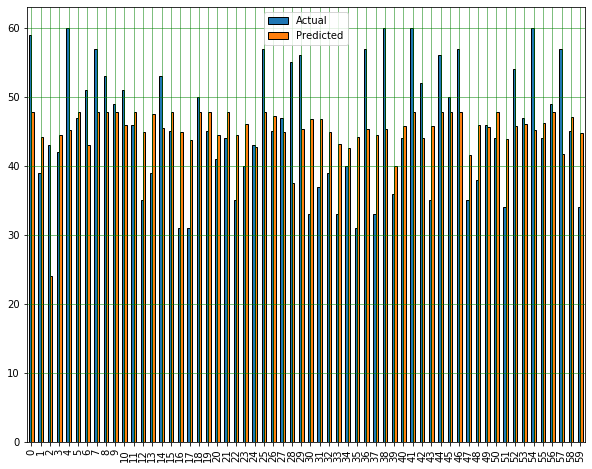

In [55]:
actual_vs_predicted.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.37278628563043
Mean Squared Error: 77.75619158877308
Root Mean Squared Error: 8.817947130073591
